# 점수 산정을 위한 건물 구조별 계수

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_building = pd.read_csv('./건물구조계수.csv', index_col=False, encoding='euc-kr')
df_building

,구조,계수,rank
0,석구조,1.22,30
1,흙벽돌조,1.21,29
2,기타조적구조,1.20,28
3,조적구조,1.20,27
4,벽돌구조,1.20,26
5,시멘트블럭조,1.20,25
6,블록구조,1.20,24
7,콘크리트구조,1.03,23
8,기타콘크리트구조,1.03,22
9,철근콘크리트구조,1.02,21


In [3]:
df_org = pd.read_csv("./DataProcessing_광주광역시건축물.csv", encoding="ansi")
df_org

,location,lat,lon,structure,area,height,ground,underground,date,seismic
0,광주광역시 광산구 고룡동 100-1번지,35.204703,126.777928,일반목구조,124.13,0.0,1,0,1974,0
1,광주광역시 광산구 고룡동 1000번지,35.202519,126.777766,일반철골구조,974.70,10.2,2,0,2016,1
2,광주광역시 광산구 고룡동 1001번지,35.190152,126.773402,일반철골구조,958.17,11.2,2,0,2016,1
3,광주광역시 광산구 고룡동 1003번지,35.137946,126.791957,일반철골구조,887.92,7.4,2,0,2016,0
4,광주광역시 광산구 고룡동 1005번지,35.190365,126.774364,일반철골구조,331.00,8.2,1,0,2017,1
...,...,...,...,...,...,...,...,...,...,...
122592,광주광역시 북구 오룡동 산 23-1번지,35.214971,126.844826,일반철골구조,19.83,0.0,1,0,1960,0
122593,광주광역시 북구 오룡동 산 24-3번지,35.228358,126.847842,일반철골구조,40.00,0.0,1,0,1960,0
122594,광주광역시 북구 오룡동 산 67번지,35.233707,126.842511,일반철골구조,29.23,0.0,1,0,1960,0
122595,광주광역시 북구 오룡동 산 70번지,35.233860,126.843889,일반철골구조,58.55,0.0,1,0,1960,0


In [4]:
blist = list(df_building["구조"].values)
len(blist)

30

# 점수 산정 공식 선정
#### 가중치를 바꿔가며 점수 분포를 비교

In [5]:
def get_build_attr(btype):
    att = pd.DataFrame(np.array([1]))
    if btype in blist:
        att = df_building["계수"].loc[df_building["구조"] == btype]
    
    return att

In [6]:
def danger_coefficient_cal1(years, aseismic, btype):
    return np.log(((2022 - years) * 0.1 + (1 - aseismic) * 2) * get_build_attr(btype).values[0])

In [7]:
def danger_coefficient_cal2(years, aseismic, btype):
    return np.log(((2022 - years) * 0.1 + (1 - aseismic) * 3) * get_build_attr(btype).values[0])

In [8]:
def danger_coefficient_cal3(years, aseismic, btype):
    return np.log(((2022 - years) * 0.1 + (1 - aseismic) * 4) * get_build_attr(btype).values[0])

In [9]:
df_org.structure.fillna("", inplace=True)

In [10]:
df_org["Score1"] = df_org.apply(lambda x: danger_coefficient_cal1(x["date"], x["seismic"], x["structure"]), axis=1)

In [11]:
df_org["Score2"] = df_org.apply(lambda x: danger_coefficient_cal2(x["date"], x["seismic"], x["structure"]), axis=1)

In [12]:
df_org["Score3"] = df_org.apply(lambda x: danger_coefficient_cal3(x["date"], x["seismic"], x["structure"]), axis=1)

# 공식별 점수 시각화

Text(0.5, 1.0, 'Fomula 1')

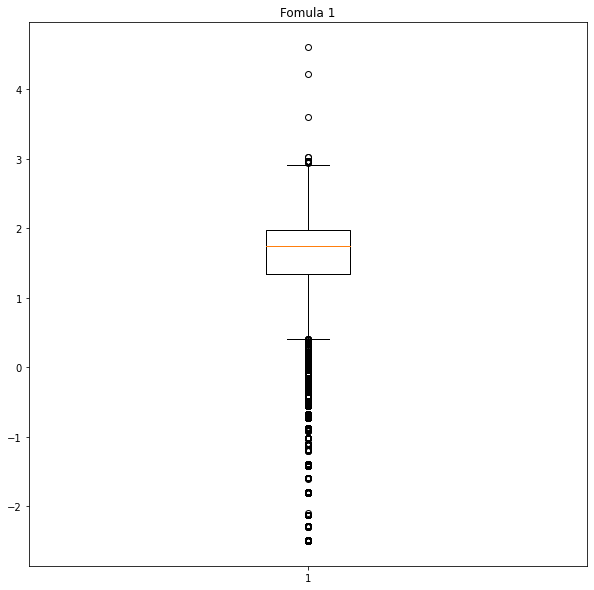

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.boxplot(df_org["Score1"])
plt.title("Fomula 1")


Text(0.5, 1.0, 'Fomula 2')

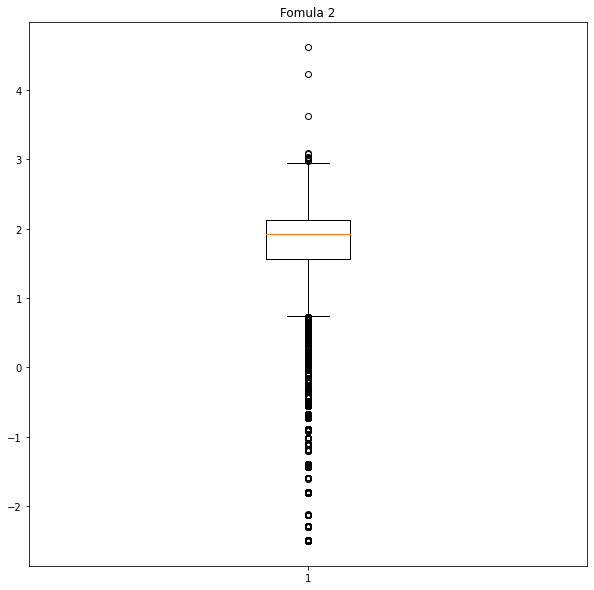

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.boxplot(df_org["Score2"])
plt.title("Fomula 2")


Text(0.5, 1.0, 'Fomula 3')

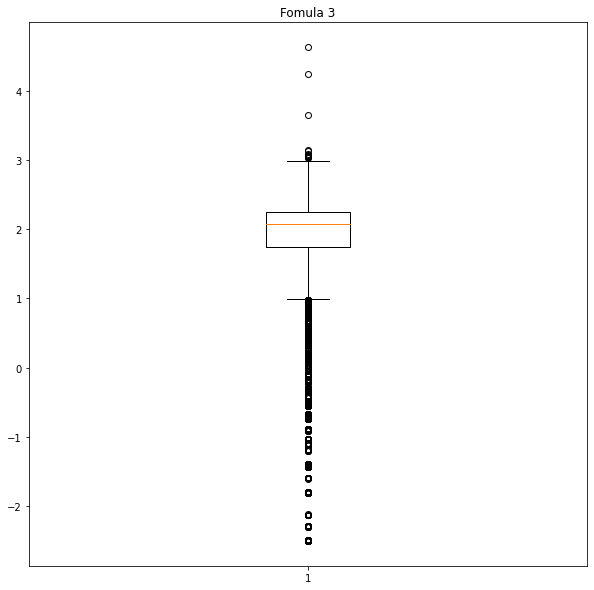

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.boxplot(df_org["Score3"])
plt.title("Fomula 3")


In [16]:
df_org["Score3"].describe()

count     122597.000000
unique       725.000000
top            2.504709
freq        9083.000000
Name: Score3, dtype: float64

# Formula 3 선정

In [17]:
df_org["Score"] = df_org["Score3"]
df_org.drop(columns=["Score1", "Score2", "Score3"], inplace=True)
df_org

,location,lat,lon,structure,area,height,ground,underground,date,seismic,Score
0,광주광역시 광산구 고룡동 100-1번지,35.204703,126.777928,일반목구조,124.13,0.0,1,0,1974,0,1.976301
1,광주광역시 광산구 고룡동 1000번지,35.202519,126.777766,일반철골구조,974.70,10.2,2,0,2016,1,-0.697155
2,광주광역시 광산구 고룡동 1001번지,35.190152,126.773402,일반철골구조,958.17,11.2,2,0,2016,1,-0.697155
3,광주광역시 광산구 고룡동 1003번지,35.137946,126.791957,일반철골구조,887.92,7.4,2,0,2016,0,1.339727
4,광주광역시 광산구 고룡동 1005번지,35.190365,126.774364,일반철골구조,331.00,8.2,1,0,2017,1,-0.879477
...,...,...,...,...,...,...,...,...,...,...,...
122592,광주광역시 북구 오룡동 산 23-1번지,35.214971,126.844826,일반철골구조,19.83,0.0,1,0,1960,0,2.136058
122593,광주광역시 북구 오룡동 산 24-3번지,35.228358,126.847842,일반철골구조,40.00,0.0,1,0,1960,0,2.136058
122594,광주광역시 북구 오룡동 산 67번지,35.233707,126.842511,일반철골구조,29.23,0.0,1,0,1960,0,2.136058
122595,광주광역시 북구 오룡동 산 70번지,35.233860,126.843889,일반철골구조,58.55,0.0,1,0,1960,0,2.136058


In [18]:
df_org['Score'] = pd.to_numeric(df_org['Score'],errors = 'coerce')
df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122597 entries, 0 to 122596
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   location     122597 non-null  object 
 1   lat          122597 non-null  float64
 2   lon          122597 non-null  float64
 3   structure    122597 non-null  object 
 4   area         122597 non-null  float64
 5   height       122597 non-null  float64
 6   ground       122597 non-null  int64  
 7   underground  122597 non-null  int64  
 8   date         122597 non-null  int64  
 9   seismic      122597 non-null  int64  
 10  Score        122538 non-null  float64
dtypes: float64(5), int64(4), object(2)
memory usage: 10.3+ MB


In [19]:
df_org.to_csv("Scored 광주건물.csv", sep=",", na_rep="NaN", encoding="ansi", index = False)